In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data/YAF_sad/YAF_dip_sad.wav
/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data/YAF_sad/YAF_knock_sad.wav
/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data/YAF_sad/YAF_bean_sad.wav
/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data/YAF_sad/YAF_haze_sad.wav
/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data/YAF_sad/YAF_cab_sad.wav
/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data/YAF_sad/YAF_dime_sad.wav
/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data/YAF_sad/YAF_gaze_sad.wav
/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data/YAF_sad/YAF_judge_sad.wav
/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data/YAF_sad/YAF_hush_sad.wav
/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data/YAF_sad/YAF_fail_sad.wav
/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data/YAF_sad/YAF_fat_sad.wav


In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')
paths[:5]
labels[:5]
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()
df['label'].value_counts()

Dataset is Loaded


sad        400
disgust    400
neutral    400
angry      400
fear       400
ps         400
happy      400
Name: label, dtype: int64

Exploratory Data Analysis

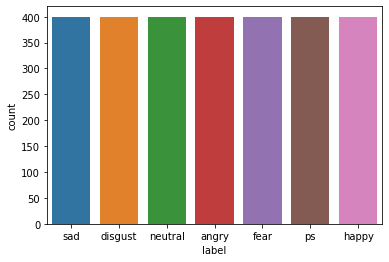

In [ ]:
sns.countplot(df["label"])

In [ ]:

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()


['/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data/YAF_fear/YAF_size_fear.wav'
 '/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav'
 '/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data/YAF_fear/YAF_door_fear.wav'
 '/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data/YAF_fear/YAF_live_fear.wav'
 '/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data/YAF_fear/YAF_sub_fear.wav'
 '/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data/YAF_fear/YAF_sell_fear.wav'
 '/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data/YAF_fear/YAF_bean_fear.wav'
 '/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data/YAF_fear/YAF_mode_fear.wav'
 '/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data/YAF_fear/YAF_mouse_fear.wav'
 '/content/drive/MyDrive/PFA/TESS Toronto emotional speech set data/YAF_fear/YAF_young_fear.wav'
 '/content/drive/MyDrive/PFA/TESS Tor

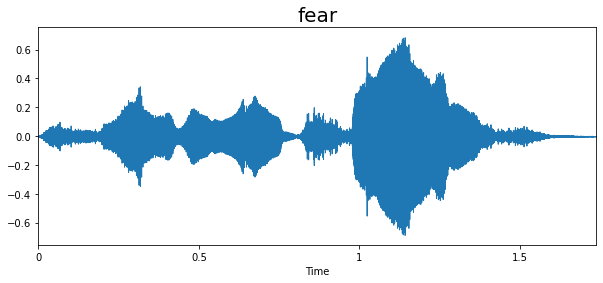

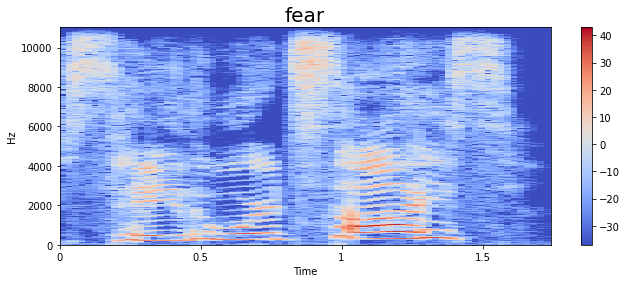

In [ ]:
emotion = 'fear'
print(np.array(df['speech'][df['label']==emotion]))
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

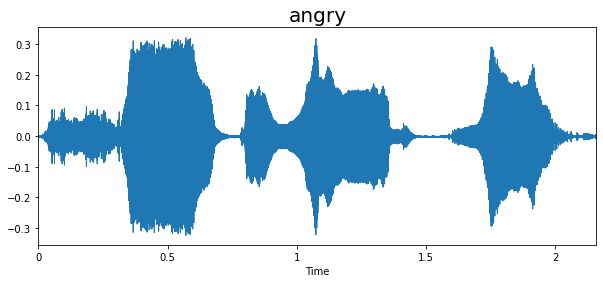

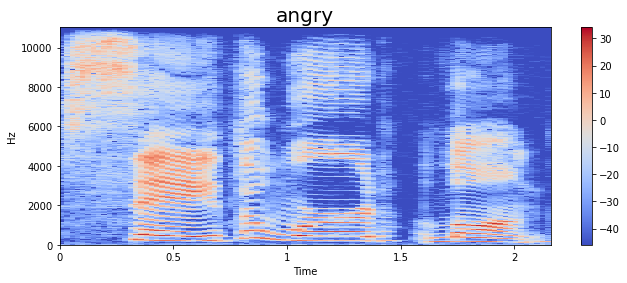

In [ ]:

emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

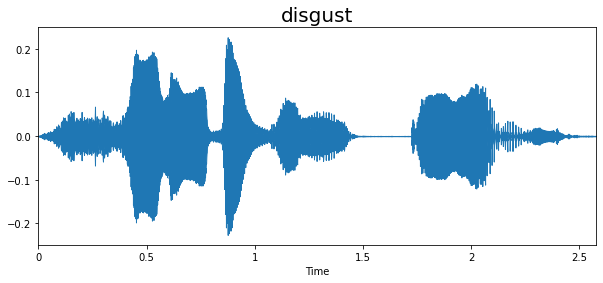

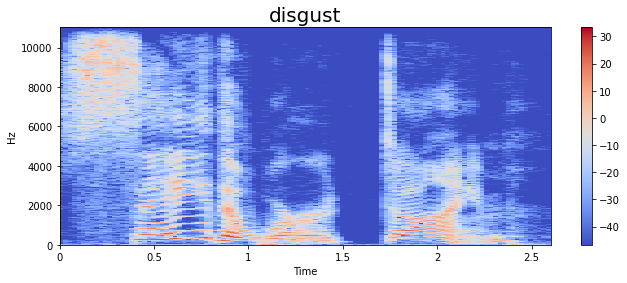

In [ ]:

emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

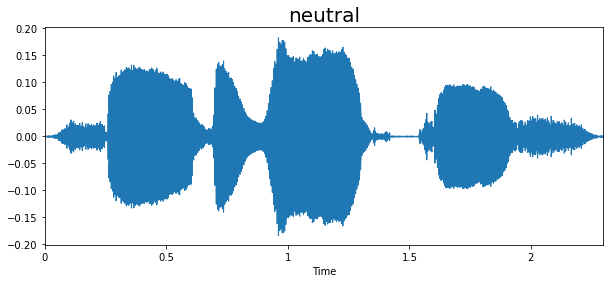

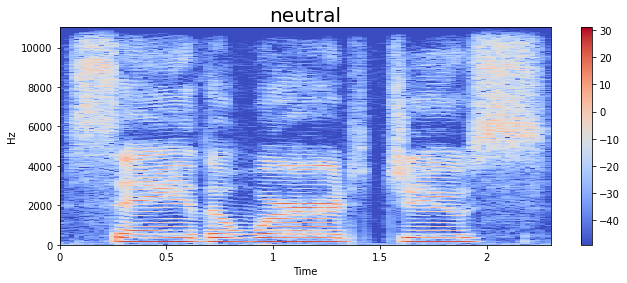

In [ ]:

emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

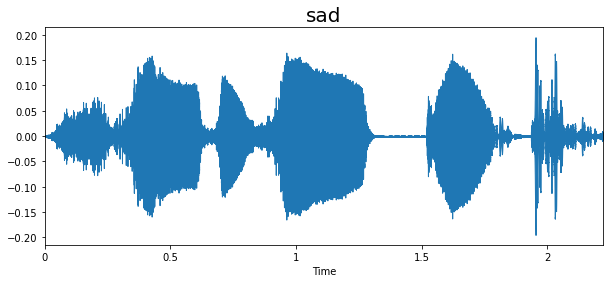

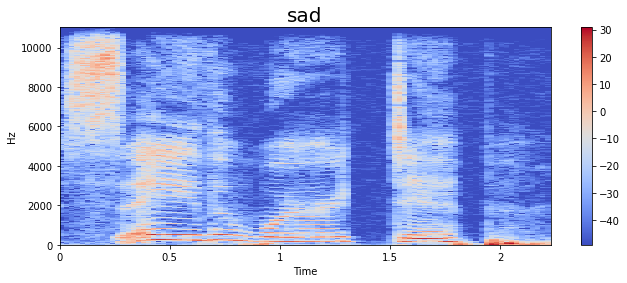

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

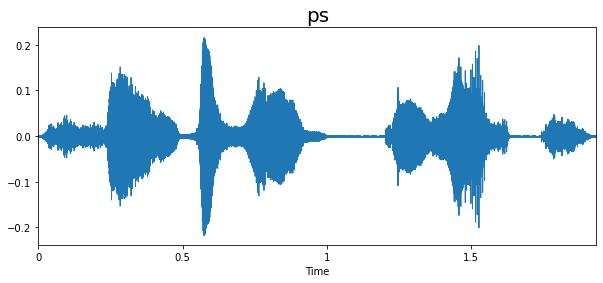

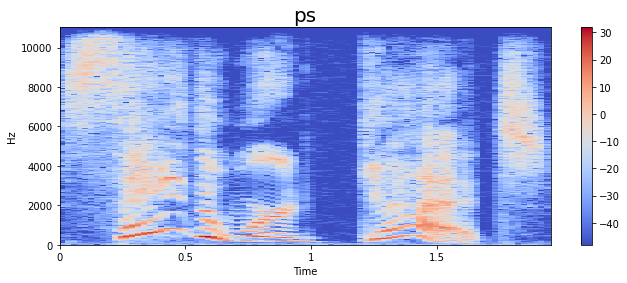

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

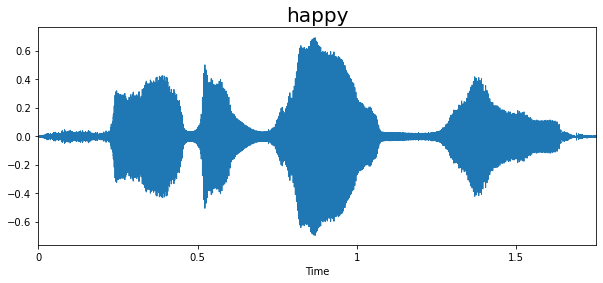

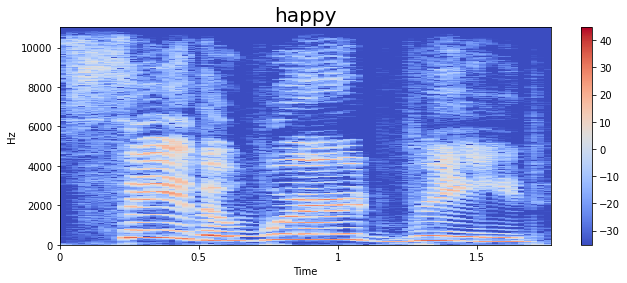

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-4.3392273e+02,  9.0073845e+01,  2.6910191e+01,  4.1493687e+01,
        4.7027493e+00,  1.2833338e+01,  1.8620577e+00, -5.8336163e+00,
        9.4898090e+00, -5.6409936e+00, -2.8165624e+00,  1.5602143e+00,
       -6.3439817e+00,  1.0948597e+01, -6.2251630e+00,  6.5416247e-02,
       -5.0182968e-01, -1.9668674e+00, -5.7306118e+00, -2.8682311e+00,
       -6.6314697e+00, -5.9697204e+00, -4.0229564e+00,  1.7289575e+00,
       -1.2589318e+00,  7.7422671e+00,  8.5479683e-01,  2.5223577e-01,
       -1.7788293e+00, -1.4262577e+00,  1.9280634e+00,  1.3614902e+01,
        9.7305222e+00,  1.1909694e+01,  4.1712937e+00,  1.5648847e+00,
        1.1164190e-01,  2.4269905e+00,  5.0158095e+00,  6.4327793e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc

0       [-433.92273, 90.073845, 26.91019, 41.493687, 4...
1       [-372.5978, 101.0642, 26.975325, 27.965538, -6...
2       [-418.56805, 90.644455, 20.9378, 46.01841, 2.5...
3       [-404.25806, 77.80317, 42.598892, 52.810295, 1...
4       [-395.9975, 94.367226, 10.69139, 29.10822, -5....
                              ...                        
2795    [-515.5019, 103.239746, 16.712858, 4.5627904, ...
2796    [-556.38257, 87.7227, 28.119263, 21.08263, 24....
2797    [-481.9925, 87.36664, 1.5830269, 3.1861994, 20...
2798    [-500.34494, 89.757065, 20.357838, -5.80344, 5...
2799    [-542.16626, 91.588, 22.642008, 8.299818, 19.4...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()
y.shape

(2800, 7)

Creating the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size= 64)


Epoch 1/50
35/35 [==============================] - 2s 21ms/step - loss: 1.4218 - accuracy: 0.4304 - val_loss: 0.6412 - val_accuracy: 0.7554
Epoch 2/50
35/35 [==============================] - 0s 9ms/step - loss: 0.5068 - accuracy: 0.8214 - val_loss: 1.9043 - val_accuracy: 0.6321
Epoch 3/50
35/35 [==============================] - 0s 8ms/step - loss: 0.2568 - accuracy: 0.9170 - val_loss: 2.1709 - val_accuracy: 0.6179
Epoch 4/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1737 - accuracy: 0.9451 - val_loss: 2.5241 - val_accuracy: 0.6036
Epoch 5/50
35/35 [==============================] - 0s 9ms/step - loss: 0.1601 - accuracy: 0.9536 - val_loss: 1.6760 - val_accuracy: 0.6554
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1482 - accuracy: 0.9531 - val_loss: 2.7593 - val_accuracy: 0.6321
Epoch 7/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1022 - accuracy: 0.9670 - val_loss: 3.4466 - val_accuracy: 0.6018
Epoch 8/50
35/35 [=

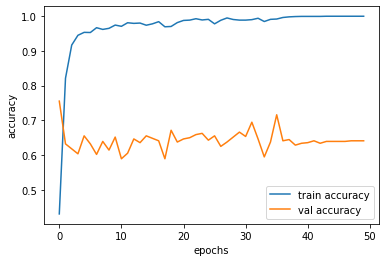

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

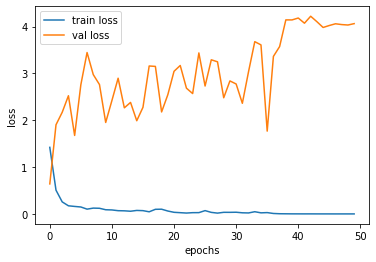

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()